<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

## <center> Assignment 4. Sarcasm detection with logistic regression
    
We'll be using the dataset from the [paper](https://arxiv.org/abs/1704.05579) "A Large Self-Annotated Corpus for Sarcasm" with >1mln comments from Reddit, labeled as either sarcastic or not. A processed version can be found on Kaggle in a form of a [Kaggle Dataset](https://www.kaggle.com/danofer/sarcasm).

Sarcasm detection is easy. 
<img src="https://habrastorage.org/webt/1f/0d/ta/1f0dtavsd14ncf17gbsy1cvoga4.jpeg" />

In [1]:
# some necessary imports
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv('../../../mlcourse_data/sarcasm/train-balanced-sarcasm.csv')

In [3]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
label             1010826 non-null int64
comment           1010773 non-null object
author            1010826 non-null object
subreddit         1010826 non-null object
score             1010826 non-null int64
ups               1010826 non-null int64
downs             1010826 non-null int64
date              1010826 non-null object
created_utc       1010826 non-null object
parent_comment    1010826 non-null object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


Some comments are missing, so we drop the corresponding rows.

In [5]:
train_df.dropna(subset=['comment'], inplace=True)

We notice that the dataset is indeed balanced

In [6]:
train_df['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

We split data into training and validation parts.

In [7]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state=17)

## Tasks:
1. Analyze the dataset, make some plots. This [Kernel](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc) might serve as an example
2. Build a Tf-Idf + logistic regression pipeline to predict sarcasm (`label`) based on the text of a comment on Reddit (`comment`).
3. Plot the words/bigrams which a most predictive of sarcasm (you can use [eli5](https://github.com/TeamHG-Memex/eli5) for that)
4. (optionally) add subreddits as new features to improve model performance. Apply here the Bag of Words approach, i.e. treat each subreddit as a new feature.

## Links:
  - Machine learning library [Scikit-learn](https://scikit-learn.org/stable/index.html) (a.k.a. sklearn)
  - Kernels on [logistic regression](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-2-classification) and its applications to [text classification](https://www.kaggle.com/kashnitsky/topic-4-linear-models-part-4-more-of-logit), also a [Kernel](https://www.kaggle.com/kashnitsky/topic-6-feature-engineering-and-feature-selection) on feature engineering and feature selection
  - [Kaggle Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) "Approaching (Almost) Any NLP Problem on Kaggle"
  - [ELI5](https://github.com/TeamHG-Memex/eli5) to explain model predictions

In [8]:
train_df['label'].value_counts(normalize=True)

0    0.500018
1    0.499982
Name: label, dtype: float64

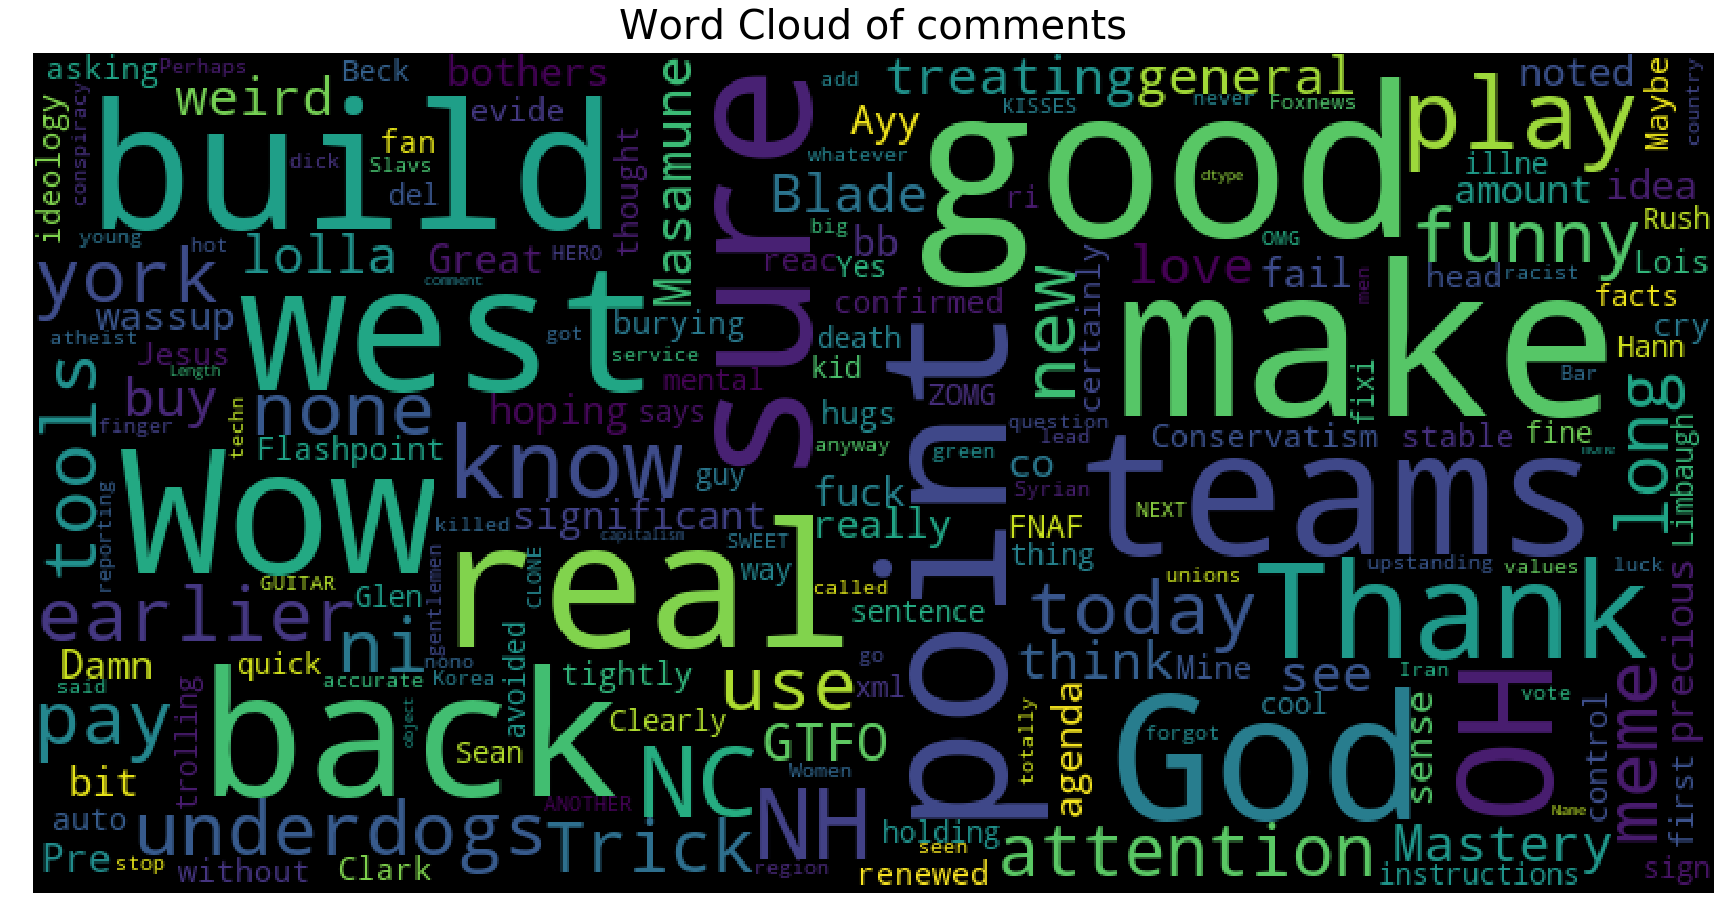

In [9]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train_df["comment"], title="Word Cloud of comments")

In [10]:
from collections import defaultdict
train1_df = train_df[train_df["label"]==1]
train0_df = train_df[train_df["label"]==0]
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-sarcastic comments", 
                                          "Frequent words of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [11]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

In [12]:
# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of non-sarcastic comments", 
                                          "Frequent bigrams of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
fig['layout'].margin.l=150
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [13]:
freq_dict = defaultdict(int)
for sent in train0_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in train1_df["comment"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')


In [14]:
# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.4,
                          subplot_titles=["Frequent trigrams of non-sarcastic comments", 
                                          "Frequent trigrams of sarcastic comments"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
fig['layout'].margin.l=150
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## TFIDF

In [8]:
%%time
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
X_train = tfidf.fit_transform(train_texts)
X_valid = tfidf.transform(valid_texts)

Wall time: 19.9 s


In [9]:
len(tfidf.get_feature_names())

142999

In [10]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

Wall time: 35.3 s


In [11]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.709, 0.675)

### Cross-validation

In [8]:
from sklearn.model_selection import validation_curve, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV 

In [35]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
C_vector = np.logspace(-3, 3, 7)
logit_searcher = LogisticRegressionCV(Cs=C_vector, n_jobs=-1, random_state=17, cv=skf)

In [36]:
logit_searcher.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [44]:
logit_searcher.scores_[1].mean(axis=0)

array([0.66096278, 0.6822033 , 0.69138968, 0.68867097, 0.68564886,
       0.68597468, 0.68442603])

In [50]:
best_C = logit_searcher.C_[0]
best_C

0.1

In [51]:
logit_best = LogisticRegression(C=best_C, solver='lbfgs', n_jobs=-1, random_state=17)

In [52]:
logit_best.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
round(logit_best.score(X_train, y_train), 3), round(logit_best.score(X_valid, y_valid), 3),

(0.707, 0.694)

## Better TFIDF?

In [12]:
tfidf2 = TfidfVectorizer(min_df=2, max_features=50000, ngram_range=(1,2))

In [13]:
%%time
X_train = tfidf2.fit_transform(train_texts)
X_valid = tfidf2.transform(valid_texts)

Wall time: 53.1 s


In [14]:
X_train.shape, train_texts.shape

((758079, 50000), (758079,))

In [15]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 28.3 s


In [16]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.748, 0.721)

In [65]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
C_vector = np.logspace(-3, 3, 7)
logit_searcher = LogisticRegressionCV(Cs=C_vector, n_jobs=-1, random_state=17, cv=skf)

In [66]:
logit_searcher.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [67]:
logit_searcher.scores_[1].mean(axis=0)

array([0.65278685, 0.67722098, 0.70748431, 0.71794892, 0.71023073,
       0.70672714, 0.70537635])

In [68]:
best_C = logit_searcher.C_[0]
best_C

1.0

In [69]:
%%time
logit_best = LogisticRegression(C=best_C, solver='lbfgs', n_jobs=-1, random_state=17)
logit_best.fit(X_train, y_train)

Wall time: 17 s


In [70]:
round(logit_best.score(X_train, y_train), 3), round(logit_best.score(X_valid, y_valid), 3),

(0.748, 0.721)

In [18]:
import eli5
eli5.show_weights(estimator=logit, vec=tfidf2)

Weight?,Feature
+9.367,yes because
+7.605,clearly
+7.318,yeah because
+7.253,obviously
+6.691,totally
+6.472,because
+6.071,how dare
+5.947,right because
+5.389,but thought
+5.310,duh


## More experiments

In [83]:
tfidf3 = TfidfVectorizer(min_df=2, max_features=50000, ngram_range=(1,1))
X_train = tfidf3.fit_transform(train_texts)
X_valid = tfidf3.transform(valid_texts)

In [84]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 17min 31s


In [85]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.717, 0.693)

In [87]:
tfidf3 = TfidfVectorizer(max_features=50000, ngram_range=(1,1))
X_train = tfidf3.fit_transform(train_texts)
X_valid = tfidf3.transform(valid_texts)

In [88]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 18.9 s


In [89]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.716, 0.693)

In [90]:
tfidf3 = TfidfVectorizer(max_features=50000, ngram_range=(1,2))
X_train = tfidf3.fit_transform(train_texts)
X_valid = tfidf3.transform(valid_texts)

In [91]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 26.1 s


In [92]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.749, 0.721)

In [103]:
%%time
tfidf3 = TfidfVectorizer(min_df=2, max_features=50000, ngram_range=(1,3))
X_train = tfidf3.fit_transform(train_texts)
X_valid = tfidf3.transform(valid_texts)

Wall time: 1min 23s


In [104]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 29.9 s


In [105]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.75, 0.722)

ngram_range has a significant effect on the performance

## Adding subreddits

In [19]:
subs = train_df['subreddit']
train_subs, valid_subs = train_test_split(subs, random_state=17)

In [20]:
tfidf_subs = TfidfVectorizer()

In [21]:
%%time
sub_train = tfidf_subs.fit_transform(train_subs)
sub_valid = tfidf_subs.transform(valid_subs)

Wall time: 6.05 s


In [22]:
from scipy.sparse import hstack
X_train = hstack([X_train, sub_train])
X_valid = hstack([X_valid, sub_valid])

In [23]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

Wall time: 22.7 s


In [24]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_valid, y_valid), 3),

(0.745, 0.724)

### Cross-Validation

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
C_vector = np.logspace(-3, 3, 7)
logit_searcher = LogisticRegressionCV(Cs=C_vector, n_jobs=-1, random_state=17, cv=skf)

In [37]:
logit_searcher.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [38]:
best_C = logit_searcher.C_[0]
best_C

1.0

## Comment score

In [58]:
score_df = train_df[train_df['score']>=0].groupby('score')['label'].agg([np.size, np.sum, np.mean])

In [59]:
score_df[score_df['size']>300].sort_values(by='mean', ascending=False)[:10]

,size,sum,mean
score,,,
0,58141,35626,0.612752
20,3096,1738,0.561370
34,1071,596,0.556489
26,1874,1039,0.554429
59,315,174,0.552381
18,3951,2180,0.551759
13,7277,3980,0.546929
17,4404,2404,0.545867
40,722,394,0.545706


In [60]:
score_df = train_df[train_df['score']<0].groupby('score')['label'].agg([np.size, np.sum, np.mean])

In [61]:
score_df[score_df['size']>300].sort_values(by='mean', ascending=False)[:10]

,size,sum,mean
score,,,
-14,537,375,0.698324
-8,1852,1289,0.696004
-9,1503,1039,0.691284
-6,3088,2127,0.688795
-12,776,531,0.684278
-5,4134,2805,0.678520
-3,6736,4554,0.676069
-2,11924,8060,0.675948
-4,5436,3661,0.673473


In [26]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [27]:
df1, df2 = train_test_split(train_df, random_state=17)

In [28]:
class ColumnExtractor(object):

    def __init__(self, col_name):
        self.col_name = col_name

    def transform(self, X):
        return X[self.col_name].values

    def fit(self, X, y=None):
        return self

In [196]:
process_and_join_features = Pipeline([
    ('features', FeatureUnion([
             ('text_features', Pipeline([
                ('extract', ColumnExtractor('comment')),
                ('vec', TfidfVectorizer(min_df=2, max_features=50000, ngram_range=(1,3)))
            ]))
         ])),
    ('clf', LogisticRegression(random_state=17))
])

In [197]:
process_and_join_features.fit(df1, df1['label'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('text_features', Pipeline(memory=None,
     steps=[('extract', <__main__.ColumnExtractor object at 0x0000017DAFCF4780>), ('vec', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.f..., penalty='l2', random_state=17, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [198]:
process_and_join_features.score(df2, df2['label'])

0.7218374793228173

In [29]:
class Reshaper(object):

    def __init__(self):
        a=3

    def transform(self, X):
        return X.reshape(-1,1)

    def fit(self, X, y=None):
        return self

In [30]:
from sklearn.preprocessing import StandardScaler, Normalizer
process_and_join_features = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('extract', ColumnExtractor('score')),
                ('reshape', Reshaper()),
                ('normalize', Normalizer())
                
            ])),
             ('text_features', Pipeline([
                ('extract', ColumnExtractor('comment')),
                ('vec', TfidfVectorizer(min_df=2, max_features=50000, ngram_range=(1,3)))
            ]))
         ])),
    ('clf', LogisticRegression(random_state=17, solver='lbfgs', n_jobs=-1))
])

In [31]:
%%time
process_and_join_features.fit(df1, df1['label'])

Wall time: 1min 56s


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('extract', <__main__.ColumnExtractor object at 0x000001FBCFFEAC88>), ('reshape', <__main__.Reshaper object at 0x000001FBCFFEACC0>), ('normalize', Normalizer(copy=True, norm=... penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))])

In [32]:
%%time
process_and_join_features.score(df2, df2['label'])

Wall time: 12.6 s


0.7224389973644012

In [2]:
arr = np.array([['low', 1.11],
               ['high', 2.1],
               ['medium', 3.45],
               ['high', 32.123],
               ['low', 22.3],
               ['medium', 12.33]])

In [3]:
arr = pd.DataFrame(arr)

In [4]:
arr = arr.rename(index=str, columns={0:'Level', 1:'Salary'})

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [6]:
numerical_features=['Salary']
categorical_features = ['Level']

In [74]:
#numeric_transformer = Pipeline([('scaler', StandardScaler())])

In [7]:
categoric_transformer = Pipeline([('onehot', OneHotEncoder(drop='first'))])

In [81]:
'''column_transformer = ColumnTransformer([('num', numeric_transformer, numerical_features),
                                       ('cat', categoric_transformer, categorical_features)])
'''

In [8]:
column_transformer = ColumnTransformer([('cat', categoric_transformer, categorical_features)], remainder='passthrough')

In [9]:
column_transformer.fit_transform(arr)

array([[1.0, 0.0, '1.11'],
       [0.0, 0.0, '2.1'],
       [0.0, 1.0, '3.45'],
       [0.0, 0.0, '32.123'],
       [1.0, 0.0, '22.3'],
       [0.0, 1.0, '12.33']], dtype=object)